In [13]:
"""Visualize embeddings produced"""
import numpy as np
import tensorflow as tf 
import h5py
import matplotlib.pyplot as plt
import os

from skimage import measure

import utils
import nearest_vectors

%load_ext autoreload
%autoreload 2

os.environ['CUDA_VISIBLE_DEVICES'] = ''

ROOT = '/usr/people/kluther/Projects/metric_segmentation/'

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [7]:
%%javascript
require(
        ["notebook/js/outputarea"],
        function (oa) {
            oa.OutputArea.auto_scroll_threshold = -1;
            console.log("Setting auto_scroll_threshold to -1");
        });

<IPython.core.display.Javascript object>

In [11]:
"""Load data"""
#em_imgs  = h5py.File(os.path.join(ROOT, 'data', 'human_labels_boundary.h5'), 'r')['main']
#em_imgs  = h5py.File(os.path.join(ROOT, 'data', 'voronoi_boundary.h5'), 'r')['main']
em_imgs  = h5py.File(os.path.join(ROOT, 'data', 'image.h5'), 'r')['main']
seg_imgs = h5py.File(os.path.join(ROOT, 'data', 'human_labels_split.h5'), 'r')['main']
#seg_imgs = h5py.File(os.path.join(ROOT, 'data', 'voronoi_segmentation.h5'), 'r')['main']

"""
em_imgs_train = em_imgs[:192]
seg_imgs_train = seg_imgs[:192]
em_imgs_dev = em_imgs[192:]
seg_imgs_dev = seg_imgs[192:]
"""
em_imgs_train = em_imgs[:16]
seg_imgs_train = seg_imgs[:16]
em_imgs_dev = em_imgs[192:]
seg_imgs_dev = seg_imgs[192:]

In [28]:
"""Load model"""
N = 10000 #Iteration number
#EXP_NAME = 'j_loss_boundary_map_input_affinity_1_mask_on'
EXP_NAME = 'j_loss_boundary_mask_on_split_objects'
#EXP_NAME = 'j_loss_output_dim_16'
#EXP_NAME = 'boundary_mask_off_augment_on'
MODEL_NAME = os.path.join(ROOT, 'experiments', EXP_NAME, 'models', 'model{}.ckpt'.format(N))

tf.reset_default_graph()
sess = tf.Session()
inputs, outputs = utils.load_model(MODEL_NAME, sess)

INFO:tensorflow:Restoring parameters from /usr/people/kluther/Projects/metric_segmentation/experiments/j_loss_boundary_mask_on_split_objects/models/model10000.ckpt


In [21]:
def affinity(x,y):
    return np.exp(-0.5*np.linalg.norm(x-y, axis=-1)**2)

In [30]:
centroids_dev, vectors_dev = {}, {} 
for i in range(len(em_imgs_dev)):
    if i == 1: break
    if i % 5 == 0: print("Processing img: {}".format(i))
    em_img, seg_img = em_imgs_dev[i][:572,:572], seg_imgs_dev[i][92:572-92,92:572-92]
    vec_img = utils.generate_vector_labels(inputs, outputs, em_img, sess)
    centroids, vectors = nearest_vectors.find_object_ids_centroids_vectors([seg_img], [vec_img])
    
    centroids = [(2**20*i+ID, val) for ID,val in centroids.items()]
    vectors = [(2**20*i+ID, val) for ID,val in vectors.items()]
    centroids_dev.update(centroids)
    vectors_dev.update(vectors)

Processing img: 0


In [43]:
"""Generate vector labels for a particular input image"""
em_train = em_imgs_train[0, 0:572, 0:572]
seg_train = seg_imgs_train[0, 0:572, 0:572]
vec_train = utils.generate_vector_labels(inputs, outputs, em_train, sess)

em_dev = em_imgs_dev[0, 0:572, 0:572]
seg_dev = seg_imgs_dev[0, 0:572, 0:572]
vec_dev = utils.generate_vector_labels(inputs, outputs, em_dev, sess)

em_dev2 = em_imgs_dev[3, 0:572, 0:572]
seg_dev2 = seg_imgs_dev[2, 0:572, 0:572]
vec_dev2 = utils.generate_vector_labels(inputs, outputs, em_dev2, sess)

# Crop input images to match output sizes 
l = (572-388)//2
u = l+388
em_train = em_train[l:u, l:u]
em_dev = em_dev[l:u, l:u]
seg_train = seg_train[l:u,l:u]
seg_dev = seg_dev[l:u,l:u]

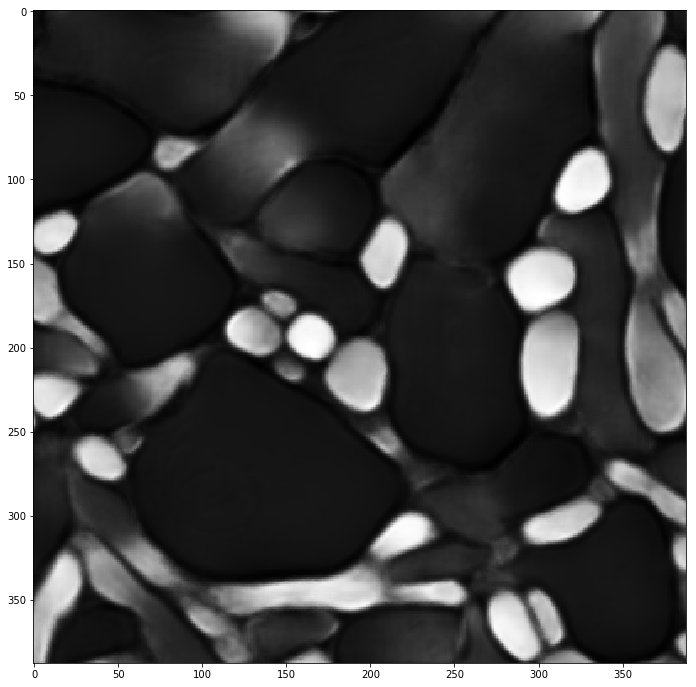

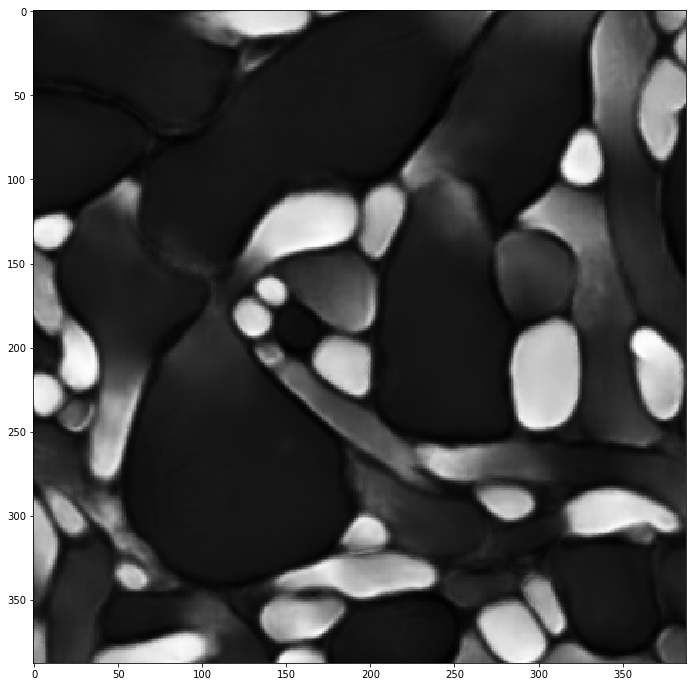

In [44]:
amap = affinity(vec_dev[200,165], vec_dev)
plt.figure(figsize=(12,12))
plt.imshow(amap,cmap='gray');plt.show()

amap = affinity(vec_dev[200,165], vec_dev2)
plt.figure(figsize=(12,12))
plt.imshow(amap,cmap='gray');plt.show()

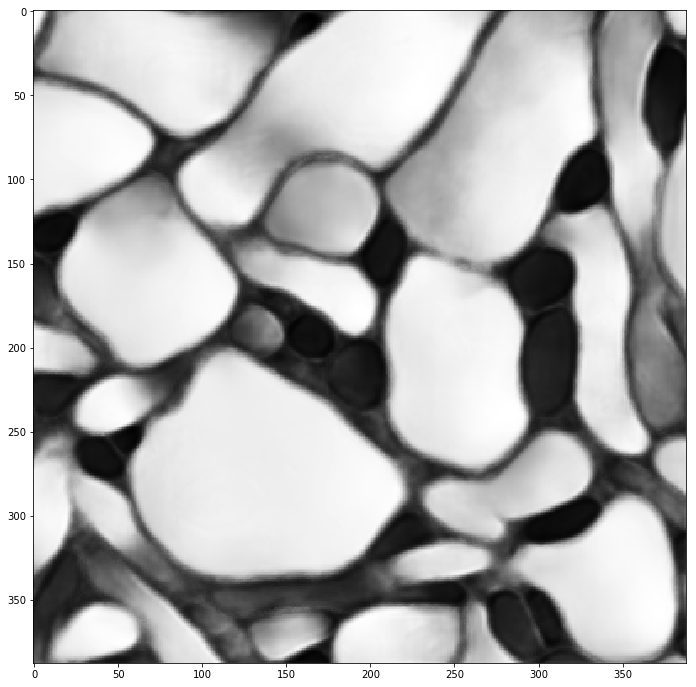

In [32]:
plt.figure(figsize=(12,12))
plt.imshow(amap,cmap='gray');plt.show()